# <!--BOOK_INFORMATION-->

This notebook is based on and adapted from the following sources:
*  [Whirlwind Tour of Python](http://www.oreilly.com/programming/free/a-whirlwind-tour-of-python.csp) by Jake VanderPlas (available [on GitHub](https://github.com/jakevdp/WhirlwindTourOfPython), licensed under the [CC0](https://github.com/jakevdp/WhirlwindTourOfPython/blob/master/LICENSE) license), a fast-paced introduction to essential components of the Python language for data science and/or scientific programming;
* [Python Data Science Handbook](https://github.com/jakevdp/PythonDataScienceHandbook) by Jake VanderPlas, licensed under the [CC-BY-NC-ND](https://creativecommons.org/licenses/by-nc-nd/3.0/us/legalcode) and [MIT](https://opensource.org/licenses/MIT) licenses;
* [Google Colab tutorials](https://colab.research.google.com/notebooks/mlcc/intro_to_pandas.ipynb).


# Data manipulation with Pandas

Pandas is a newer package built on top of NumPy, and provides an efficient implementation of a ``DataFrame``.
``DataFrame``s are essentially multidimensional arrays with attached row and column labels, and often with heterogeneous types and/or missing data.
As well as offering a convenient storage interface for labeled data, Pandas implements a number of powerful data operations familiar to users of both database frameworks and spreadsheet programs.

As we saw, NumPy's ``ndarray`` data structure provides essential features for the type of clean, well-organized data typically seen in numerical computing tasks.
While it serves this purpose very well, its limitations become clear when we need more flexibility (e.g., attaching labels to data, working with missing data, etc.) and when attempting operations that do not map well to element-wise broadcasting (e.g., groupings, pivots, etc.), each of which is an important piece of analyzing the less structured data available in many forms in the world around us.
Pandas, and in particular its ``Series`` and ``DataFrame`` objects, builds on the NumPy array structure and provides efficient access to these sorts of "data munging" tasks that occupy much of a data scientist's time.




Installation of Pandas on your system requires NumPy to be installed.
Details on this installation can be found in the [Pandas documentation](http://pandas.pydata.org/).
If you are using the Anaconda stack as suggested, Pandas will already be installed. Similarly, Colab includes pandas automatically.

Just like we usually ```import numpy as np```, pandas is abbreviated to pd and it supports built-in documentation.

In [1]:
import pandas as pd
import numpy as np

## Basic Concepts



The primary data structures in *pandas* are implemented as two classes:

  * **`DataFrame`**, which you can imagine as a relational data table, with rows and named columns.
  * **`Series`**, which is a single column. A `DataFrame` contains one or more `Series` and a name for each `Series`.

The data frame is a commonly used abstraction for data manipulation.  

One way to create a `Series` is to construct a `Series` object. For example:

In [3]:
pd.Series(['San Francisco', 'San Jose', 'Sacramento'])

0    San Francisco
1         San Jose
2       Sacramento
dtype: object

Note that this generalizes NumPy arrays. In a NumPy array, the index is always an integer, in contrast, pandas Series can have an explicitly defined index associated with the values.

In [4]:
data = pd.Series(['San Francisco', 'San Jose', 'Sacramento'],
          index=['a','b','c'])
data['a']

'San Francisco'

The ```Index``` behaves much like an immutable array, we can access elements through indexing, slicing etc. ```Index``` objects also have attributes familiar from numPy arrays like size, shape, ndim and dtype.

`DataFrame` objects can be created by passing a `dict` mapping `string` column names to their respective `Series`. If the `Series` don't match in length, missing values are filled with special [NA/NaN](http://pandas.pydata.org/pandas-docs/stable/missing_data.html) values. Example:

In [5]:
city_names = pd.Series(['San Francisco', 'San Jose', 'Sacramento'])
population = pd.Series([852469, 1015785, 485199])

pd.DataFrame({ 'City name': city_names, 'Population': population })

,City name,Population
0,San Francisco,852469
1,San Jose,1015785
2,Sacramento,485199


But most of the time, you load an entire file into a `DataFrame`. The following example loads a file with California housing data. Run the following cell to load the data and create feature definitions:

In [6]:
california_housing_dataframe = pd.read_csv("https://download.mlcc.google.com/mledu-datasets/california_housing_train.csv", sep=",")
california_housing_dataframe.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000
mean,-119.562108,35.625225,28.589353,2643.664412,539.410824,1429.573941,501.221941,3.883578,207300.912353
std,2.005166,2.137340,12.586937,2179.947071,421.499452,1147.852959,384.520841,1.908157,115983.764387
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.790000,33.930000,18.000000,1462.000000,297.000000,790.000000,282.000000,2.566375,119400.000000
50%,-118.490000,34.250000,29.000000,2127.000000,434.000000,1167.000000,409.000000,3.544600,180400.000000
75%,-118.000000,37.720000,37.000000,3151.250000,648.250000,1721.000000,605.250000,4.767000,265000.000000
max,-114.310000,41.950000,52.000000,37937.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


The example above used `DataFrame.describe` to show interesting statistics about a `DataFrame`. Another useful function is `DataFrame.head`, which displays the first few records of a `DataFrame`:

In [7]:
california_housing_dataframe.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


Another powerful feature of *pandas* is graphing. For example, `DataFrame.hist` lets you quickly study the distribution of values in a column. We will look at more sophisticated plotting later.

array([[<AxesSubplot: title={'center': 'housing_median_age'}>]],
      dtype=object)

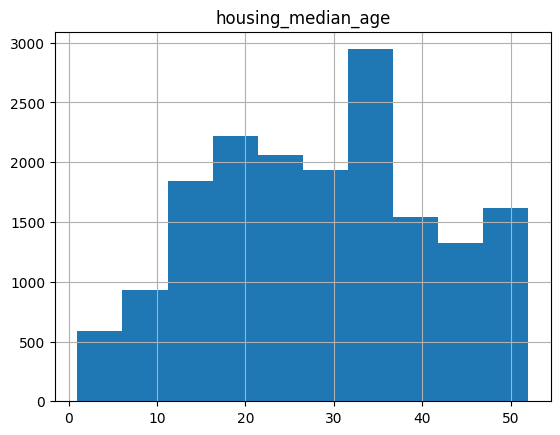

In [8]:
california_housing_dataframe.hist('housing_median_age')

## Data Selection in DataFrame
When we discussed NumPy arrays, we saw several useful ways of accessing and modifying the data, like indexing (e.g., ``arr[2, 1]``), slicing (e.g., ``arr[:, 1:5]``), masking (e.g., ``arr[arr > 0]``), fancy indexing (e.g., ``arr[0, [1, 5]]``), and combinations thereof (e.g., ``arr[:, [1, 5]]``).

We will now look at s imilar operations on dataframes.
Recall that a ``DataFrame`` acts in many ways like a two-dimensional or structured array, and in other ways like a dictionary of ``Series`` structures sharing the same index.
These analogies can be helpful to keep in mind as we explore data selection within this structure.

### DataFrame as a dictionary

The first analogy we will consider is the ``DataFrame`` as a dictionary of related ``Series`` objects.
Let's return to our example of areas and populations of states:

In [10]:
area = pd.Series({'California': 423967, 'Texas': 695662,
                  'New York': 141297, 'Florida': 170312,
                  'Illinois': 149995})
pop = pd.Series({'California': 38332521, 'Texas': 26448193,
                 'New York': 19651127, 'Florida': 19552860,
                 'Illinois': 12882135})
data = pd.DataFrame({'area':area, 'pop':pop})
data

,area,pop
California,423967,38332521
Texas,695662,26448193
New York,141297,19651127
Florida,170312,19552860
Illinois,149995,12882135


The individual ``Series`` that make up the columns of the ``DataFrame`` can be accessed via dictionary-style indexing of the column name:

In [11]:
data['pop']

California    38332521
Texas         26448193
New York      19651127
Florida       19552860
Illinois      12882135
Name: pop, dtype: int64

Equivalently, we can use attribute-style access with column names that are strings:

In [12]:
data.pop

<bound method DataFrame.pop of               area       pop
California  423967  38332521
Texas       695662  26448193
New York    141297  19651127
Florida     170312  19552860
Illinois    149995  12882135>

This attribute-style column access actually accesses the exact same object as the dictionary-style access:

In [13]:
data.area is data['area']

True

Though this is a useful shorthand, keep in mind that it does not work for all cases!
For example, if the column names are not strings, or if the column names conflict with methods of the ``DataFrame``, this attribute-style access is not possible.
For example, the ``DataFrame`` has a ``pop()`` method, so ``data.pop`` will point to this rather than the ``"pop"`` column:

In [14]:
data.pop is data['pop']

False

In particular, you should avoid the temptation to try column assignment via attribute (i.e., use ``data['pop'] = z`` rather than ``data.pop = z``).

The dictionary-style syntax can also be used to modify the object, in this case adding a new column:

In [15]:
data['density'] =1
data

,area,pop,density
California,423967,38332521,1
Texas,695662,26448193,1
New York,141297,19651127,1
Florida,170312,19552860,1
Illinois,149995,12882135,1


In [16]:
data['density'] = data['pop'] / data['area']
data

,area,pop,density
California,423967,38332521,90.413926
Texas,695662,26448193,38.018740
New York,141297,19651127,139.076746
Florida,170312,19552860,114.806121
Illinois,149995,12882135,85.883763


### DataFrame as two-dimensional array

As mentioned previously, we can also view the ``DataFrame`` as an enhanced two-dimensional array.
We can examine the raw underlying data array using the ``values`` attribute:

In [17]:
data.values

array([[4.23967000e+05, 3.83325210e+07, 9.04139261e+01],
       [6.95662000e+05, 2.64481930e+07, 3.80187404e+01],
       [1.41297000e+05, 1.96511270e+07, 1.39076746e+02],
       [1.70312000e+05, 1.95528600e+07, 1.14806121e+02],
       [1.49995000e+05, 1.28821350e+07, 8.58837628e+01]])

With this picture in mind, many familiar array-like observations can be done on the ``DataFrame`` itself.
For example, we can transpose the full ``DataFrame`` to swap rows and columns:

In [18]:
data.T # performs a transpose

,California,Texas,New York,Florida,Illinois
area,4.239670e+05,6.956620e+05,1.412970e+05,1.703120e+05,1.499950e+05
pop,3.833252e+07,2.644819e+07,1.965113e+07,1.955286e+07,1.288214e+07
density,9.041393e+01,3.801874e+01,1.390767e+02,1.148061e+02,8.588376e+01


When it comes to indexing of ``DataFrame`` objects, however, it is clear that the dictionary-style indexing of columns precludes our ability to simply treat it as a NumPy array.
In particular, passing a single index to an array accesses a row:

In [19]:
data.values[0]

array([4.23967000e+05, 3.83325210e+07, 9.04139261e+01])

and passing a single "index" to a ``DataFrame`` accesses a column:

In [20]:
data['area']

California    423967
Texas         695662
New York      141297
Florida       170312
Illinois      149995
Name: area, dtype: int64

Thus for array-style indexing, we need another convention.
Here Pandas uses the ``loc`` and ``iloc`` indexers (the ``ix`` indexers is deprecated and discouraged).
Using the ``iloc`` indexer, we can index the underlying array as if it is a simple NumPy array (using the implicit Python-style index), but the ``DataFrame`` index and column labels are maintained in the result:

In [21]:
# .iloc[ row-indices, col-indices]
# start:end:stepsize
data.iloc[2:5, ::2]

,area,density
New York,141297,139.076746
Florida,170312,114.806121
Illinois,149995,85.883763


Similarly, using the ``loc`` indexer we can index the underlying data in an array-like style but using the explicit index and column names:

In [22]:
# .loc[ row-names, col-names ]
data.loc['New York':'Illinois', 'area':'density':2]

,area,density
New York,141297,139.076746
Florida,170312,114.806121
Illinois,149995,85.883763


In [23]:
data.at['New York', 'pop']
data.iat[0,2]

90.41392608386974

Any of the familiar NumPy-style data access patterns can be used within these indexers.
For example, in the ``loc`` indexer we can combine masking and fancy indexing as in the following:

In [24]:
data.density > 100

California    False
Texas         False
New York       True
Florida        True
Illinois      False
Name: density, dtype: bool

In [25]:
data.loc[data.density > 100, ['pop', 'density']]

,pop,density
New York,19651127,139.076746
Florida,19552860,114.806121


Any of these indexing conventions may also be used to set or modify values; this is done in the standard way that you might be accustomed to from working with NumPy:

In [26]:
data.iloc[0, 2] = 90
data

,area,pop,density
California,423967,38332521,90.000000
Texas,695662,26448193,38.018740
New York,141297,19651127,139.076746
Florida,170312,19552860,114.806121
Illinois,149995,12882135,85.883763


To build up your fluency in Pandas data manipulation, I suggest spending some time with a simple ``DataFrame`` and exploring the types of indexing, slicing, masking, and fancy indexing that are allowed by these various indexing approaches.

### Exercises: Filtering and selecting data
Time for you to try.

Create a new column name 'side' with the square root of the value in 'area' (in other words, assume the state is a square with area 'area' - what is the side length?)

In [30]:
data['side'] = np.sqrt(area)
data

,area,pop,density,side
California,423967,38332521,90.000000,651.127484
Texas,695662,26448193,38.018740,834.063547
New York,141297,19651127,139.076746,375.894932
Florida,170312,19552860,114.806121,412.688745
Illinois,149995,12882135,85.883763,387.291880


Select only the rows with pop greater than 20 000 000. You can do it with or without  using  ``.loc``. (Remember that ``pop()`` is a dataframe function, so we have to be a little careful.)

In [34]:
filtered_data = data[data['pop'] > 20000000]
filtered_data

,area,pop,density,side
California,423967,38332521,90.00000,651.127484
Texas,695662,26448193,38.01874,834.063547


Use ``.iloc`` to show the population for the last two rows:

In [38]:
data.iloc[3:5, ::]

,area,pop,density,side
Florida,170312,19552860,114.806121,412.688745
Illinois,149995,12882135,85.883763,387.291880


# Operating on Data in Pandas

One of the essential pieces of NumPy is the ability to perform quick element-wise operations, both with basic arithmetic (addition, subtraction, multiplication, etc.) and with more sophisticated operations (trigonometric functions, exponential and logarithmic functions, etc.).
Pandas inherits much of this functionality from NumPy, and ufuncs are key to this.

Pandas includes a couple useful twists, however: for unary operations like negation and trigonometric functions, these ufuncs will *preserve index and column labels* in the output, and for binary operations such as addition and multiplication, Pandas will automatically *align indices* when passing the objects to the ufunc.
This means that keeping the context of data and combining data from different sources–both potentially error-prone tasks with raw NumPy arrays–become essentially foolproof ones with Pandas.

## Ufuncs: Index Preservation

Because Pandas is designed to work with NumPy, any NumPy ufunc will work on Pandas ``Series`` and ``DataFrame`` objects.
Let's start by defining a simple ``Series``  on which to demonstrate this:

In [32]:
import pandas as pd
import numpy as np

In [33]:
rng = np.random.RandomState(42)
ser = pd.Series(rng.randint(0, 10, 4))
ser

0    6
1    3
2    7
3    4
dtype: int64

If we apply a NumPy ufunc on a series or dataframe, the result will be another Pandas object *with the indices preserved:*

In [34]:
np.exp(ser)

0     403.428793
1      20.085537
2    1096.633158
3      54.598150
dtype: float64

Any of the NumPy ufuncs can be used in a similar manner.

# Aggregation and Grouping

An essential piece of analysis of large data is efficient summarization: computing aggregations like ``sum()``, ``mean()``, ``median()``, ``min()``, and ``max()``, in which a single number gives insight into the nature of a potentially large dataset.
In this section, we'll explore aggregations in Pandas, from simple operations akin to what we've seen on NumPy arrays, to more sophisticated operations based on the concept of a ``groupby``.

## Simple Aggregation in Pandas

Earlier, we explored some of the data aggregations available for NumPy arrays.
As with a one-dimensional NumPy array, for a Pandas ``Series`` the aggregates return a single value:

In [35]:
data

,area,pop,density,side,side2
California,423967,38332521,90.000000,651.127484,651.127484
Texas,695662,26448193,38.018740,834.063547,834.063547
New York,141297,19651127,139.076746,375.894932,375.894932
Florida,170312,19552860,114.806121,412.688745,412.688745
Illinois,149995,12882135,85.883763,387.291880,387.291880


In [36]:
data['area'].mean()

316246.6

In [37]:
data['pop'].sum()

116866836

For a ``DataFrame``, by default the aggregates return results within each column:

In [38]:
data.mean()

area       3.162466e+05
pop        2.337337e+07
density    9.355707e+01
side       5.322133e+02
side2      5.322133e+02
dtype: float64

By specifying the ``axis`` argument, you can instead aggregate within each row:

In [40]:
data.mean(axis='columns')

California    7.751576e+06
Texas         5.429112e+06
New York      3.958663e+06
Florida       3.944822e+06
Illinois      2.606598e+06
dtype: float64

The following table summarizes some other built-in Pandas aggregations:

| Aggregation              | Description                     |
|--------------------------|---------------------------------|
| ``count()``              | Total number of items           |
| ``first()``, ``last()``  | First and last item             |
| ``mean()``, ``median()`` | Mean and median                 |
| ``min()``, ``max()``     | Minimum and maximum             |
| ``std()``, ``var()``     | Standard deviation and variance |
| ``mad()``                | Mean absolute deviation         |
| ``prod()``               | Product of all items            |
| ``sum()``                | Sum of all items                |

These are all methods of ``DataFrame`` and ``Series`` objects.

Pandas ``Series`` and ``DataFrame``s include all of the common aggregates we already saw; in addition, there is a convenience method ``describe()`` that computes several common aggregates for each column and returns the result.

To go deeper into the data, however, simple aggregates are often not enough.
The next level of data summarization is the ``groupby`` operation, which allows you to quickly and efficiently compute aggregates on subsets of data.

## GroupBy: Split, Apply, Combine

Simple aggregations can give you a flavor of your dataset, but often we would prefer to aggregate conditionally on some label or index: this is implemented in the so-called ``groupby`` operation.
The name "group by" comes from a command in the SQL database language, but it is perhaps more illuminative to think of it in the terms first coined by Hadley Wickham of Rstats fame: *split, apply, combine*.

### Split, apply, combine

A canonical example of this split-apply-combine operation, where the "apply" is a summation aggregation, is illustrated in this figure:

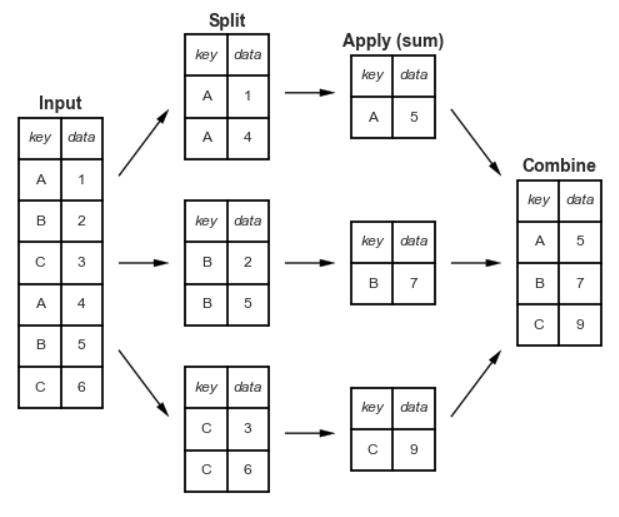![](figures/03.08-split-apply-combine.png)

This makes clear what the ``groupby`` accomplishes:

- The *split* step involves breaking up and grouping a ``DataFrame`` depending on the value of the specified key.
- The *apply* step involves computing some function, usually an aggregate, transformation, or filtering, within the individual groups.
- The *combine* step merges the results of these operations into an output array.

While this could certainly be done manually using some combination of the masking, aggregation, and merging commands covered earlier, an important realization is that *the intermediate splits do not need to be explicitly instantiated*. Rather, the ``GroupBy`` can (often) do this in a single pass over the data, updating the sum, mean, count, min, or other aggregate for each group along the way.
The power of the ``GroupBy`` is that it abstracts away these steps: the user need not think about *how* the computation is done under the hood, but rather thinks about the *operation as a whole*.

As a concrete example, let's take a look at using Pandas for the computation shown in this diagram.
We'll start by creating the input ``DataFrame``:

In [72]:
df = pd.DataFrame({'key': ['A', 'B', 'C', 'A', 'B', 'C'],
                   'data': range(6)}, columns=['key', 'data'])
df

,key,data
0,A,0
1,B,1
2,C,2
3,A,3
4,B,4
5,C,5


The most basic split-apply-combine operation can be computed with the ``groupby()`` method of ``DataFrame``s, passing the name of the desired key column:

In [73]:
df.groupby('key')['data'].mean()

key
A    1.5
B    2.5
C    3.5
Name: data, dtype: float64

Notice that what is returned is not a set of ``DataFrame``s, but a ``DataFrameGroupBy`` object.
This object is where the magic is: you can think of it as a special view of the ``DataFrame``, which is poised to dig into the groups but does no actual computation until the aggregation is applied.
This "lazy evaluation" approach means that common aggregates can be implemented very efficiently in a way that is almost transparent to the user.

To produce a result, we can apply an aggregate to this ``DataFrameGroupBy`` object, which will perform the appropriate apply/combine steps to produce the desired result:

In [74]:
df.groupby('key').sum()

,data
key,
A,3
B,5
C,7


The ``sum()`` method is just one possibility here; you can apply virtually any common Pandas or NumPy aggregation function, as well as virtually any valid ``DataFrame`` operation, as we will see in the following discussion.

### The GroupBy object

The ``GroupBy`` object is a very flexible abstraction.
In many ways, you can simply treat it as if it's a collection of ``DataFrame``s, and it does the difficult things under the hood. Let's see some examples using the Planets data.

Perhaps the most important operations made available by a ``GroupBy`` are *aggregate*, *filter*, *transform*, and *apply*.
Let's introduce some of the other functionality that can be used with the basic ``GroupBy`` operation.

### Aggregate

The preceding discussion focused on aggregation for the combine operation, but there are more options available.
In particular, ``GroupBy`` objects have ``aggregate()``, ``filter()``, ``transform()``, and ``apply()`` methods that efficiently implement a variety of useful operations before combining the grouped data. We'll focus on aggregation for now, refer to python notebook 6 for more details on the other operations.

For the purpose of the following subsections, we'll use this ``DataFrame``:

In [75]:
rng = np.random.RandomState(0)
df = pd.DataFrame({'key': ['A', 'B', 'C', 'A', 'B', 'C'],
                   'data1': range(6),
                   'data2': rng.randint(0, 10, 6)},
                   columns = ['key', 'data1', 'data2'])
df

,key,data1,data2
0,A,0,5
1,B,1,0
2,C,2,3
3,A,3,3
4,B,4,7
5,C,5,9


We're now familiar with ``GroupBy`` aggregations with ``sum()``, ``median()``, and the like, but the ``aggregate()`` method allows for even more flexibility.
It can take a string, a function, or a list thereof, and compute all the aggregates at once.
Here is a quick example combining all these:

In [76]:
df.groupby('key').aggregate(['min', np.median, max])

data1            data2           
      min median max   min median max
key                                  
A       0    1.5   3     3    4.0   5
B       1    2.5   4     0    3.5   7
C       2    3.5   5     3    6.0   9

Another useful pattern is to pass a dictionary mapping column names to operations to be applied on that column:

In [46]:
df.groupby('key').aggregate({'data1': 'min',
                             'data2': ['min','max']})

data1 data2    
      min   min max
key                
A       0     3   5
B       1     0   7
C       2     3   9

## Exercise: aggregation and grouping
We will add a column showing the region of a state.

In [48]:
regions = pd.Series({'California': 'West', 'Texas': 'South',
                  'New York': 'NorthEast', 'Florida': 'South',
                  'Illinois': 'MidWest'})
data['region'] = regions
data

,area,pop,density,side,side2,region
California,423967,38332521,90.000000,651.127484,651.127484,West
Texas,695662,26448193,38.018740,834.063547,834.063547,South
New York,141297,19651127,139.076746,375.894932,375.894932,NorthEast
Florida,170312,19552860,114.806121,412.688745,412.688745,South
Illinois,149995,12882135,85.883763,387.291880,387.291880,MidWest


Compute the mean area of the states, grouped by region

region
MidWest      149995.0
NorthEast    141297.0
South        432987.0
West         423967.0
Name: area, dtype: float64

Compute the mean area of the states, grouped by region, for those states that have at least an area of 180 000 square miles

region
South    695662.0
West     423967.0
Name: area, dtype: float64

Delete the column regions from data.

Hint: dataframes have a ``.drop()`` function, see the documentation for more details.

# Pandas plotting wrappers
Pandas provides easy access to basic plotting functions via the Matplotlib API with the ``.plot()`` function. Since we are still using Matplotlib in the background, a lot of the commands for adjusting plot attributes will be familiar.

Let's start by importing the required packages and downloading one of the sample data files available on the ``seaborn`` package's GitHub page.

In [62]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
plt.style.use('seaborn-whitegrid')

file_location = 'https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv'
iris = pd.read_csv(file_location)

iris.head()

<ipython-input-62-bb2d9d9f0da9>:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


The ``iris`` dataset is perhaps the most famous and frequently cited dataset in the pattern recognition literature. It contains measurements in centimeters for four attributes of three different species of iris.

The pandas ``.plot()`` function is at its most basic simply wrapper for ``plt.plot()``. When called on a dataframe it is a convenient way to plot all the columns with their labels:

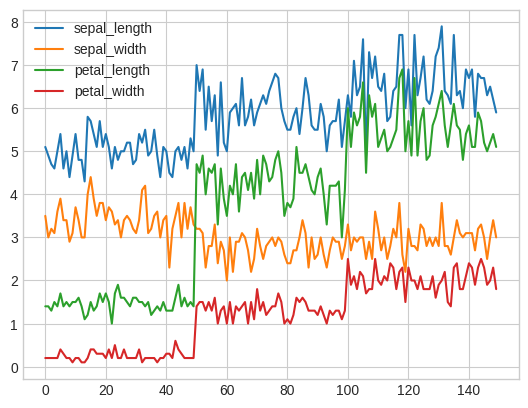

In [63]:
iris.plot();

You can also access wrappers for many of the types of plots available in Matplotlib. You can use the auto-completion ``iris.plot.<TAB>`` to show a list of available functions.

For example, we can create a scatter plot of one column against another other using the ``x`` and ``y`` arguments. Setting plot attributes is done just like with Matplotlib.

In [64]:
iris.plot.scatter?

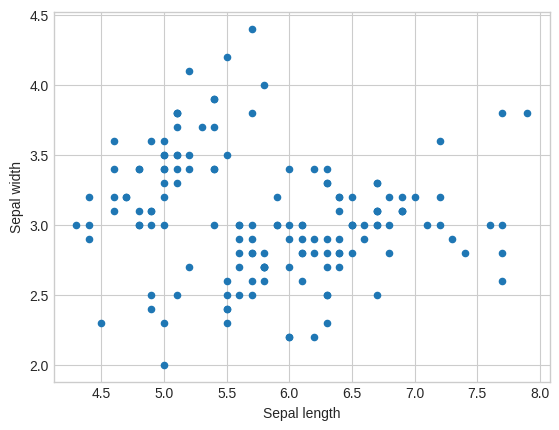

In [65]:
iris.plot.scatter(x='sepal_length', y='sepal_width')
plt.xlabel("Sepal length")
plt.ylabel("Sepal width");

Of course, we can call these methods after filtering the dataframe. For example, suppose we want to create the same scatter plot as before but only display instances with sepal length at most six:

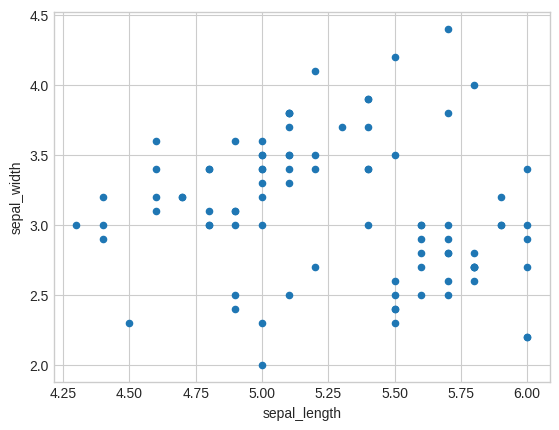

In [66]:
iris[iris.sepal_length <= 6].plot.scatter(x='sepal_length', y='sepal_width');

Histograms work as expected. For example, we can investigate the attributes of a specific species:  

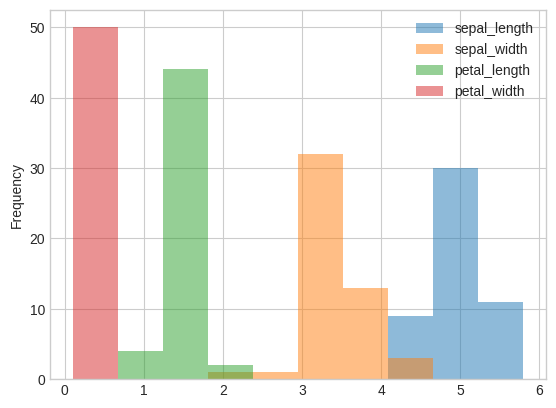

In [67]:
iris[iris.species == 'setosa'].plot.hist(alpha=0.5);

Or the distribution of a specific attribute across different species:

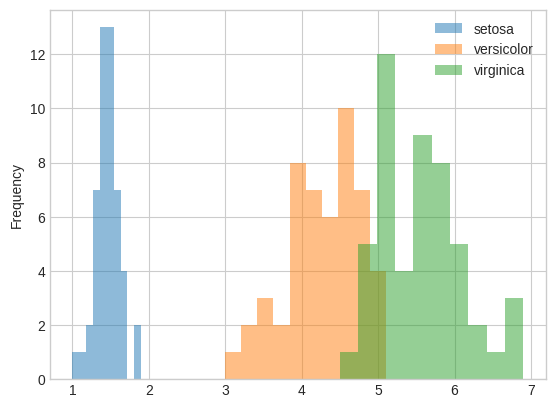

In [68]:
iris.groupby('species').petal_length.plot.hist(alpha=0.5)
plt.legend();

We can complete arbitrarily complicated aggregations before calling the plot function, for example we can compute the mean petal length per species on those samples that had petal width at most 1.8.

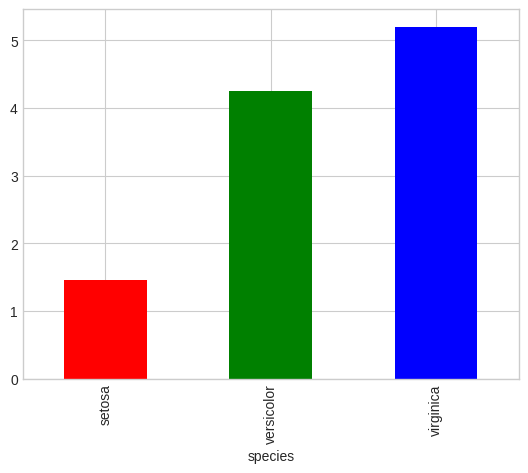

In [82]:
iris[iris.petal_width < 1.8].groupby('species')['petal_length'].mean().plot.bar(color=['r', 'g', 'b']);

Note that we cannot pass the species type into the color argument as those of you with R experience may be used to, so here I manually specify the colors to be used. Several more advanced plotting packages, including [Seaborn](https://seaborn.pydata.org/), does offer this functionality. It may be useful for you to investigate it for the group project.

In addition to the plots available via ``Dataframe.plot.<kind>``, there are the ``DataFrame.hist()``, and ``DataFrame.boxplot()`` methods, which use a separate interface. You can read more about [Dataframe.hist](https://pandas.pydata.org/docs/user_guide/visualization.html#visualization-hist) and [Dataframe.boxplot](https://pandas.pydata.org/docs/user_guide/visualization.html#visualization-box).

## Exercises - visualization

Let's look at another standard dataset, this time showing various attributes and fuel efficiency of cars.

In [77]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
plt.style.use('seaborn-whitegrid')

file_location = 'https://raw.githubusercontent.com/mwaskom/seaborn-data/master/mpg.csv'
cars = pd.read_csv(file_location)

cars.head()

<ipython-input-77-97ae73690911>:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


Let's start by seeing whether cars became more fuel efficient over time. A scatter plot with ``mpg`` on the y-axis and ``model_year`` on the x-axis should give us some insight.

<Axes: xlabel='model_year', ylabel='mpg'>

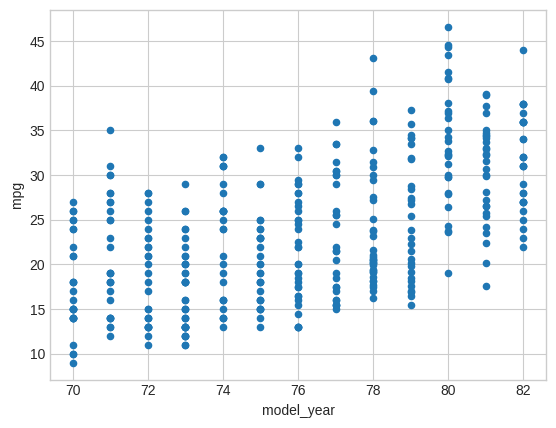

Let's see if the country of origin or the number of cylinders have an impact on fuel efficiency. Use groupby to compute the mean ``mpg`` for each of these groups, then plot it using ``.bar()``. Remember that ``.groupby()`` can take a list of column names as argument.

<Axes: xlabel='origin,cylinders'>

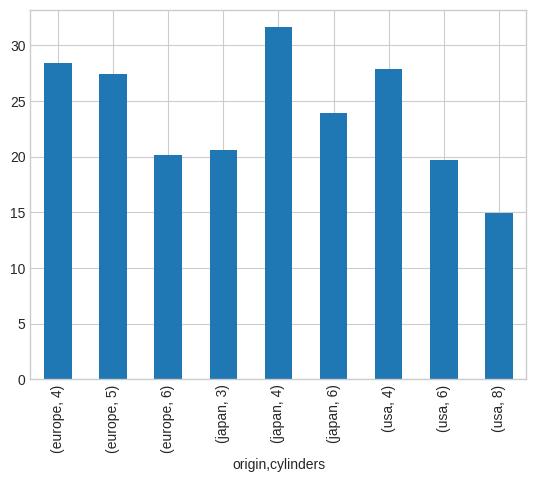

The previous visualisation does technically show us what we want, but it's not particularly easy to read or pleasing to look at.
The ``.unstack()`` function can pivot a table, so let's use that to create a column for each of the ``cylinders`` values for plotting with ``.bar()``.
Make sure to give the plot a title and labels.

<Axes: xlabel='cylinders'>

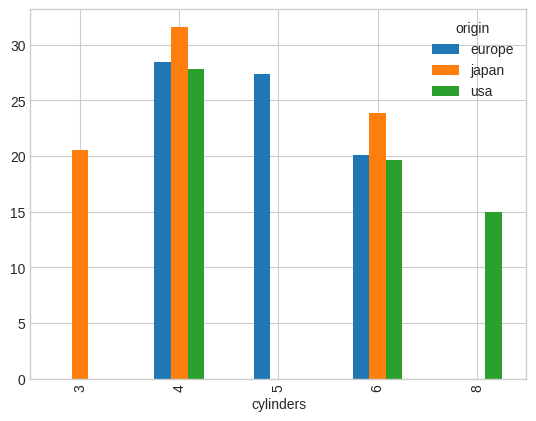

From this plot we can see that fuel efficiency tends to decrease with the number of cylinders. Let's investigate if this is the case by grouping the data according to ``cylinders`` and using a  box plot. For clarity, let's only consider the models manufactured in the US between 1975 and 1982. For efficiency, let's also plot the acceleration of these models.

Hints:  Remember that Pandas uses ``&`` instead of ``and``. The ``.boxplot()`` function has a ''column'' argument to pass the values you want to plot, and a  ``by`` argument that can be used to group the data.

array([<Axes: title={'center': 'mpg'}, xlabel='cylinders'>,
       <Axes: title={'center': 'acceleration'}, xlabel='cylinders'>],
      dtype=object)

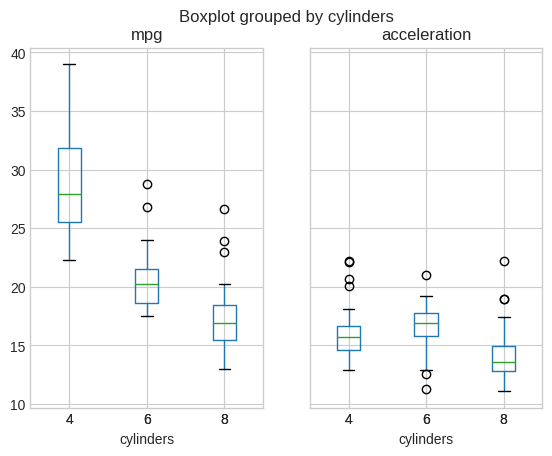